In [1]:
import pickle as pkl
import numpy as np
from scipy.stats import kendalltau

In [2]:
task = 'cls'

In [3]:
mine = pkl.load(open('/root/mindware/mindware/components/meta_learning/meta_resource/meta_dataset_vec/%s_meta_dataset_algo2perf.pkl' % task, 'rb'))
ori = pkl.load(open('/root/mindware/mindware/components/meta_learning/meta_resource/meta_dataset_ori/%s_meta_dataset_algo2perf.pkl' % task, 'rb'))

In [4]:
mine_algos = mine['algorithms_included']
ori_algos = ori['algorithms_included']
print(mine_algos)
print(ori_algos)
sel_id = [mine_algos.index(t) for t in ori_algos]
print('sel id:', sel_id)

['adaboost', 'extra_trees', 'gradient_boosting', 'k_nearest_neighbors', 'lda', 'liblinear_svc', 'libsvm_svc', 'lightgbm', 'logistic_regression', 'qda', 'random_forest', 'xgboost']
['lightgbm', 'random_forest', 'libsvm_svc', 'extra_trees', 'liblinear_svc', 'k_nearest_neighbors', 'adaboost', 'lda', 'qda']
sel id: [7, 10, 6, 1, 5, 3, 0, 4, 9]


In [5]:
mine_datas = mine['task_ids']
ori_datas = ori['task_ids']
print(mine_datas)
print(ori_datas)
sel_id2 = [mine_datas.index(t) for t in ori_datas]
print('sel id:', sel_id2)

['init_mfeat-morphological(1)', 'init_mfeat-morphological(2)', 'init_space_ga', 'init_vehicle', 'init_isolet', 'init_spectf', 'init_fri_c1_1000_25', 'init_waveform-5000(1)', 'init_fri_c1_1000_10', 'init_adult-census', 'init_fri_c2_1000_50', 'init_ionosphere', 'init_poker', 'init_eeg', 'init_mfeat-zernike(1)', 'init_optdigits', 'init_fri_c0_1000_5', 'init_madelon', 'init_elevators', 'init_cal_housing', 'init_wind', 'init_diabetes', 'init_mushroom', 'init_hypothyroid(1)', 'init_fri_c3_1000_5', 'init_winequality_red', 'init_pc3', 'init_fri_c2_1000_5', 'init_kc1', 'init_fri_c0_1000_10', 'init_mfeat-karhunen(2)', 'init_fri_c4_1000_10', 'init_house_16H', 'init_fri_c1_1000_5', 'init_mfeat-factors(2)', 'init_fri_c0_1000_50', 'init_hypothyroid(2)', 'init_vehicle_sensIT', 'init_analcatdata_supreme', 'init_ailerons', 'init_socmob', 'init_fri_c2_1000_25', 'init_fri_c1_1000_50', 'init_mammography', 'init_pc4', 'init_rmftsa_sleepdata(2)', 'init_gina_prior2', 'init_delta_elevators', 'init_pc1', 'init

In [6]:
# _mine_perfs = mine['perf4algo']['acc'][sel_id2][:, sel_id]
# mine_perfs = np.full(_mine_perfs.shape[:2], -np.inf)
# for i in range(len(_mine_perfs)):
#     for j in range(_mine_perfs.shape[1]):
#         tmp = _mine_perfs[i, j]
#         scores = tmp[np.isfinite(tmp)]
#         if len(scores) >= 1:
#             mine_perfs[i, j] = np.mean(scores)
mine_perfs = mine['perf4algo']['acc'][sel_id2][:, sel_id]
ori_perf = ori['perf4algo']

In [7]:
corrs = []
taus = []
for i in range(mine_perfs.shape[0]):
    m = mine_perfs[i]
    o = ori_perf[i]
    mask = np.isfinite(m) & np.isfinite(o)
    if mask.sum() <= 0:
        print(i)
        continue
    corr = np.corrcoef(m[mask], o[mask])[0, 1]
    tau, p_value = kendalltau(m[mask], o[mask])
    corrs.append(corr)
    taus.append(tau)

/root/miniconda/lib/python3.8/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/root/miniconda/lib/python3.8/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [8]:
# cls 0.5846059670542492, 0.45922276936768747
# rgs 0.35575358364598453, 0.24292929292929297
np.nanmean(corrs), np.nanmean(taus)

(0.5851335398083496, 0.4597468783823625)

In [9]:
id = 12
mine_perfs[id], ori_perf[id]

(array([1.        , 0.98905908, 0.99781182, 0.9868709 , 0.99781182,
        0.97374179, 1.        , 0.98905908, 0.96717724]),
 array([0.9984375 , 0.99375   , 1.        , 0.99375   , 1.        ,
        0.98125   , 0.9984375 , 0.990625  , 0.97447536]))

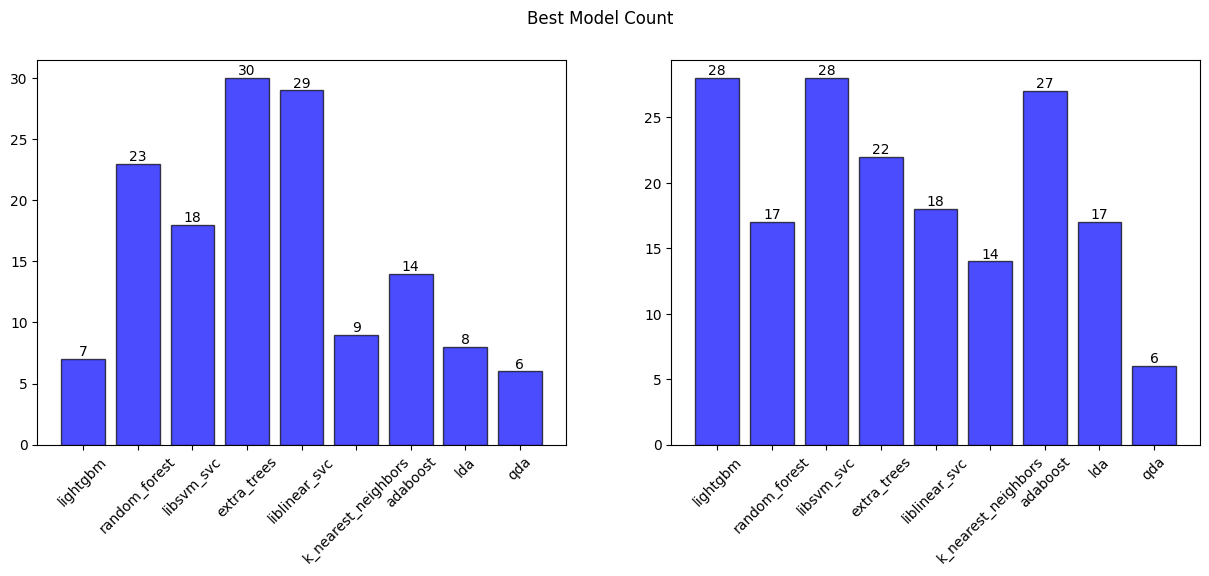

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))
plt.suptitle("Best Model Count")
plt.subplot(1, 2, 1)

counts = np.zeros(len(ori_algos), dtype=int)
max_scores = np.max(ori_perf, axis=1)
for i in range(len(max_scores)):
    max_idx = np.where(ori_perf[i] == max_scores[i])[0]
    for t in max_idx:
        counts[t] += 1
# 绘制柱状图
plt.bar(ori_algos, counts, color='blue', alpha=0.7, edgecolor='black')
# 在每个柱子上方标记数字
for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
counts = np.zeros(len(ori_algos), dtype=int)
max_scores = np.max(mine_perfs, axis=1)
for i in range(len(max_scores)):
    max_idx = np.where(mine_perfs[i] == max_scores[i])[0]
    for t in max_idx:
        counts[t] += 1
# 绘制柱状图
plt.bar(ori_algos, counts, color='blue', alpha=0.7, edgecolor='black')
# 在每个柱子上方标记数字
for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.xticks(rotation=45)
plt.show()

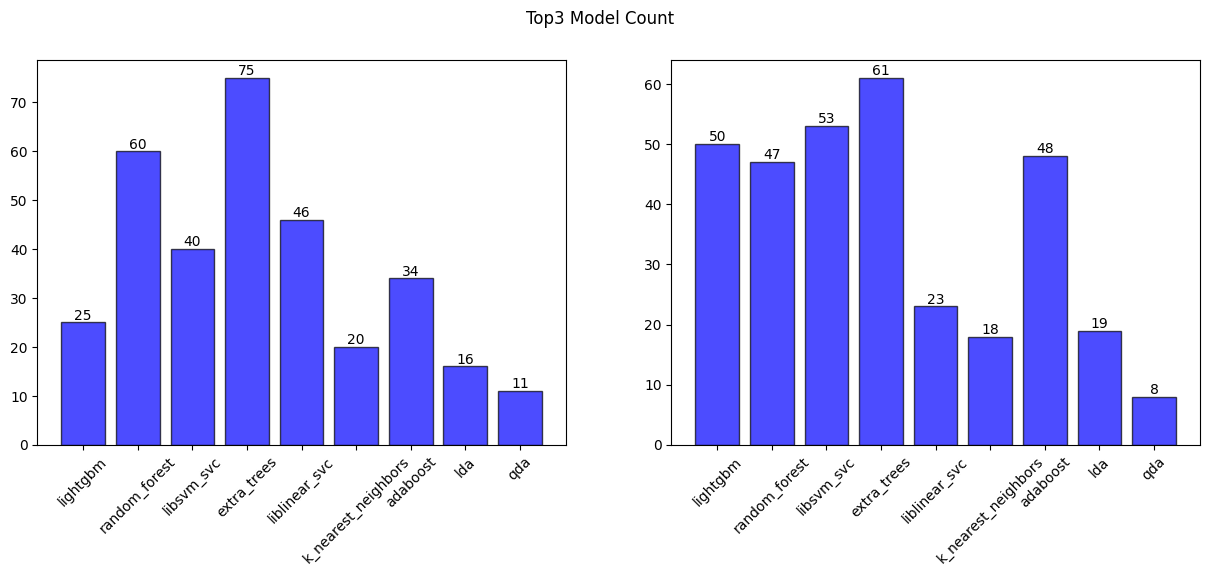

In [82]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))
plt.suptitle("Top3 Model Count")
plt.subplot(1, 2, 1)

counts = np.zeros(len(ori_algos), dtype=int)
for i in range(len(ori_perf)):
    top_idx = np.argsort(-ori_perf[i])
    for t in top_idx[:3]:
        counts[t] += 1
# 绘制柱状图
plt.bar(ori_algos, counts, color='blue', alpha=0.7, edgecolor='black')
# 在每个柱子上方标记数字
for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
counts = np.zeros(len(ori_algos), dtype=int)
for i in range(len(mine_perfs)):
    top_idx = np.argsort(-mine_perfs[i])
    for t in top_idx[:3]:
        counts[t] += 1
# 绘制柱状图
plt.bar(ori_algos, counts, color='blue', alpha=0.7, edgecolor='black')
# 在每个柱子上方标记数字
for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.xticks(rotation=45)
plt.show()
